In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import os

# Create directory to save generated images
os.makedirs("generated_images", exist_ok=True)

In [13]:
# Load MNIST dataset
(train_images, _), (test_images, _) = keras.datasets.mnist.load_data()
train_images = train_images.astype("float32") / 255.0  # Normalize to [0,1]
train_images = train_images.reshape(-1, INPUT_DIM)

# Create dataset object
dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(60000).batch(BATCH_SIZE)

In [14]:
# Model Hyperparameters
LATENT_DIM = 20  # Latent space size
HIDDEN_DIM = 360  # Hidden layer size
INPUT_DIM = 784  # Flattened MNIST images (28x28)
BATCH_SIZE = 128
NUM_EPOCHS = 50

In [15]:
# Encoder model
def build_encoder():
    inputs = keras.Input(shape=(INPUT_DIM,))
    x = layers.Dense(HIDDEN_DIM, activation="relu")(inputs)
    z = layers.Dense(LATENT_DIM)(x)
    return keras.Model(inputs, z, name="Encoder")

In [16]:
# Decoder model
def build_decoder():
    inputs = keras.Input(shape=(LATENT_DIM,))
    x = layers.Dense(HIDDEN_DIM, activation="relu")(inputs)
    outputs = layers.Dense(INPUT_DIM, activation="sigmoid")(x)  # Output in range [0,1]
    return keras.Model(inputs, outputs, name="Decoder")

In [17]:
# Discriminator model
def build_discriminator():
    inputs = keras.Input(shape=(INPUT_DIM,))
    x = layers.Dense(HIDDEN_DIM, activation="relu")(inputs)
    outputs = layers.Dense(1, activation="sigmoid")(x)  # Binary classification
    return keras.Model(inputs, outputs, name="Discriminator")

In [18]:
# Instantiate models
encoder = build_encoder()
decoder = build_decoder()
discriminator = build_discriminator()

# Optimizers
ae_optimizer = keras.optimizers.Adam(learning_rate=0.001)
d_optimizer = keras.optimizers.Adam(learning_rate=0.001)

# Loss functions
reconstruction_loss_fn = keras.losses.MeanSquaredError()
adv_loss_fn = keras.losses.BinaryCrossentropy()

Epoch 1/50, AE Loss: 0.0183, D Loss: 0.5358
Epoch 2/50, AE Loss: 0.0142, D Loss: 0.4901
Epoch 3/50, AE Loss: 0.0126, D Loss: 0.5220
Epoch 4/50, AE Loss: 0.0102, D Loss: 0.3085


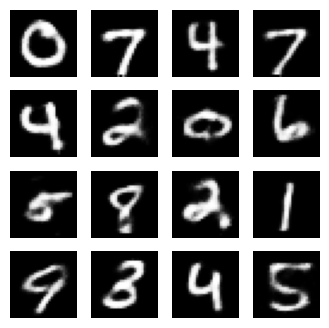

Epoch 5/50, AE Loss: 0.0108, D Loss: 0.4174
Epoch 6/50, AE Loss: 0.0103, D Loss: 0.2446
Epoch 7/50, AE Loss: 0.0096, D Loss: 0.3650
Epoch 8/50, AE Loss: 0.0086, D Loss: 0.2925
Epoch 9/50, AE Loss: 0.0085, D Loss: 0.3036


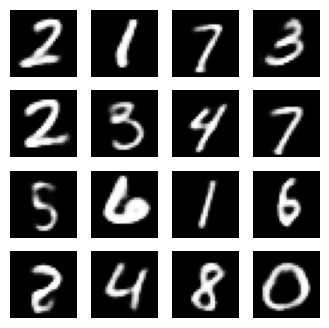

Epoch 10/50, AE Loss: 0.0078, D Loss: 0.2249
Epoch 11/50, AE Loss: 0.0086, D Loss: 0.3040
Epoch 12/50, AE Loss: 0.0077, D Loss: 0.3288
Epoch 13/50, AE Loss: 0.0086, D Loss: 0.2646
Epoch 14/50, AE Loss: 0.0080, D Loss: 0.2041


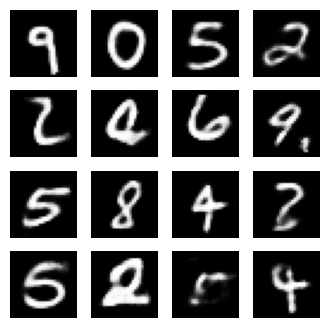

Epoch 15/50, AE Loss: 0.0071, D Loss: 0.2091
Epoch 16/50, AE Loss: 0.0081, D Loss: 0.1559
Epoch 17/50, AE Loss: 0.0069, D Loss: 0.1984
Epoch 18/50, AE Loss: 0.0078, D Loss: 0.1430
Epoch 19/50, AE Loss: 0.0078, D Loss: 0.1404


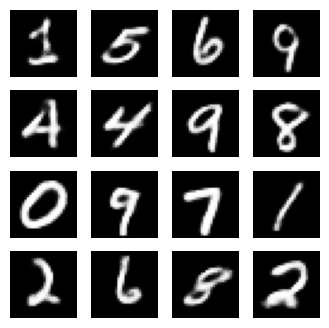

Epoch 20/50, AE Loss: 0.0068, D Loss: 0.1675
Epoch 21/50, AE Loss: 0.0081, D Loss: 0.1515
Epoch 22/50, AE Loss: 0.0066, D Loss: 0.1648
Epoch 23/50, AE Loss: 0.0082, D Loss: 0.1460
Epoch 24/50, AE Loss: 0.0065, D Loss: 0.1212


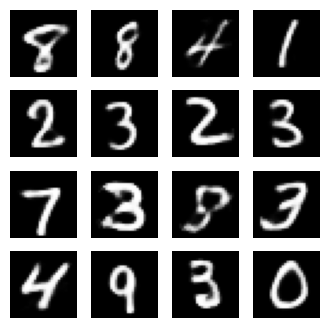

Epoch 25/50, AE Loss: 0.0073, D Loss: 0.1110
Epoch 26/50, AE Loss: 0.0072, D Loss: 0.0930
Epoch 27/50, AE Loss: 0.0070, D Loss: 0.2122
Epoch 28/50, AE Loss: 0.0076, D Loss: 0.0912
Epoch 29/50, AE Loss: 0.0074, D Loss: 0.1530


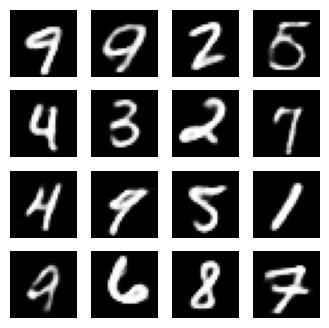

Epoch 30/50, AE Loss: 0.0066, D Loss: 0.0978
Epoch 31/50, AE Loss: 0.0067, D Loss: 0.2006
Epoch 32/50, AE Loss: 0.0072, D Loss: 0.0732
Epoch 33/50, AE Loss: 0.0067, D Loss: 0.1043
Epoch 34/50, AE Loss: 0.0066, D Loss: 0.0640


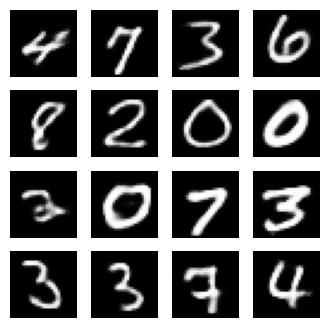

Epoch 35/50, AE Loss: 0.0063, D Loss: 0.1034
Epoch 36/50, AE Loss: 0.0063, D Loss: 0.0863
Epoch 37/50, AE Loss: 0.0070, D Loss: 0.0605
Epoch 38/50, AE Loss: 0.0068, D Loss: 0.0754
Epoch 39/50, AE Loss: 0.0068, D Loss: 0.0704


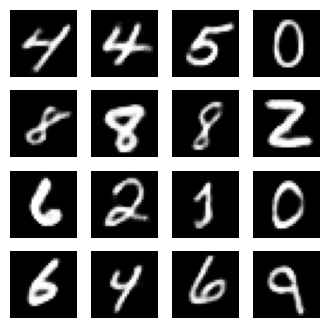

Epoch 40/50, AE Loss: 0.0077, D Loss: 0.0740
Epoch 41/50, AE Loss: 0.0066, D Loss: 0.1166
Epoch 42/50, AE Loss: 0.0065, D Loss: 0.0371
Epoch 43/50, AE Loss: 0.0063, D Loss: 0.0995
Epoch 44/50, AE Loss: 0.0070, D Loss: 0.0606


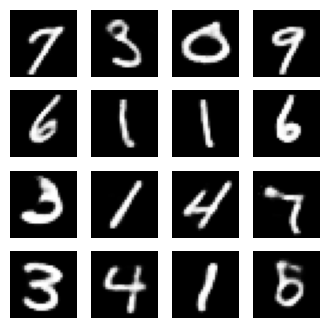

Epoch 45/50, AE Loss: 0.0064, D Loss: 0.0712
Epoch 46/50, AE Loss: 0.0067, D Loss: 0.0380
Epoch 47/50, AE Loss: 0.0067, D Loss: 0.1230
Epoch 48/50, AE Loss: 0.0067, D Loss: 0.0530
Epoch 49/50, AE Loss: 0.0064, D Loss: 0.0662


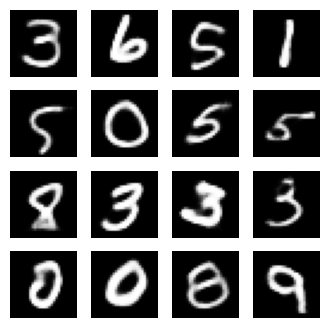

Epoch 50/50, AE Loss: 0.0069, D Loss: 0.0474


In [ ]:
# Training loop
for epoch in range(NUM_EPOCHS):
    for batch in dataset:
        # Autoencoder step
        with tf.GradientTape() as tape:
            z = encoder(batch)
            x_recon = decoder(z)
            loss_ae = reconstruction_loss_fn(batch, x_recon)
        grads = tape.gradient(loss_ae, encoder.trainable_variables + decoder.trainable_variables)
        ae_optimizer.apply_gradients(zip(grads, encoder.trainable_variables + decoder.trainable_variables))

        # Discriminator step
        real_labels = tf.ones((batch.shape[0], 1))
        fake_labels = tf.zeros((batch.shape[0], 1))
        
        with tf.GradientTape() as tape:
            d_real = discriminator(batch)
            d_fake = discriminator(x_recon)
            loss_d = adv_loss_fn(real_labels, d_real) + adv_loss_fn(fake_labels, d_fake)
        grads = tape.gradient(loss_d, discriminator.trainable_variables)
        d_optimizer.apply_gradients(zip(grads, discriminator.trainable_variables))
    
    # Save generated images every few epochs
    if (epoch + 1) % 5 == 0:

        # Select 16 random images from the dataset
        random_indices = np.random.choice(len(train_images), size=16, replace=False)
        random_imgs = train_images[random_indices]  # Extract 16 images
        random_imgs_flattened = random_imgs.reshape(16, INPUT_DIM)  # Flatten
        
        # Pass them through the encoder to get their latent states
        sample_z = encoder(random_imgs_flattened, training=False)  # Shape: (16, LATENT_DIM)
        
        # Generate images using the decoder
        generated_images = decoder(sample_z, training=False).numpy()  # Shape: (16, 784)
        generated_images = generated_images.reshape(16, 28, 28) 

        fig, axes = plt.subplots(4, 4, figsize=(4, 4))
        for i, ax in enumerate(axes.flat):
            ax.imshow(generated_images[i], cmap='gray')
            ax.axis('off')
        plt.show()
        plt.savefig(f"generated_images/epoch_{epoch+1}.png")
        plt.close()
    
    print(f"Epoch {epoch+1}/{NUM_EPOCHS}, AE Loss: {loss_ae:.4f}, D Loss: {loss_d:.4f}")